# 1_시각화기초

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,city,규모구분,year,월,price
0,0,서울,모든면적,2015,10,5841
1,1,서울,60제곱미터이하,2015,10,5652
2,2,서울,60제곱미터초과 85제곱미터이하,2015,10,5882
3,3,서울,85제곱미터초과 102제곱미터이하,2015,10,5721
4,4,서울,102제곱미터초과,2015,10,5879
...,...,...,...,...,...,...
5776,6284,경남,102제곱미터초과,2021,11,3476
5777,6285,제주,모든면적,2021,11,6860
5778,6287,제주,60제곱미터초과 85제곱미터이하,2021,11,6787
5779,6288,제주,85제곱미터초과 102제곱미터이하,2021,11,5924


# *코랩*에서 한글폰트깨지는 현상 해결방법
1. 아래코드를 실행

```
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
```


In [4]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

import numpy as np

font = fm.FontProperties(fname="C:/Windows/Fonts/NanumGothic.ttf").get_name()
mpl.rc("font",family=font)
plt.rcParams['font.family'] = 'NanumGothic'

3. 필요한 패키지, 데이터 다시 로딩

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,city,규모구분,year,월,price
0,0,서울,모든면적,2015,10,5841
1,1,서울,60제곱미터이하,2015,10,5652
2,2,서울,60제곱미터초과 85제곱미터이하,2015,10,5882
3,3,서울,85제곱미터초과 102제곱미터이하,2015,10,5721
4,4,서울,102제곱미터초과,2015,10,5879


In [7]:
# 불필요한 축 없애기 = Unnamed
df2 = df.drop('Unnamed: 0', axis=1)

<AxesSubplot:>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


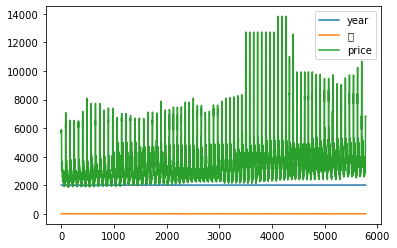

In [8]:
#드롭처리하고 그래프로 확인
df2.plot()
#근데 왜 갑자기 그래프로 확인하는거지? a.한글폰트적용확인차

In [14]:
df3= df2.loc[df['city']=='경기']
df3.tail()

,city,규모구분,year,월,price
5712,경기,모든면적,2021,11,4477
5713,경기,60제곱미터이하,2021,11,4509
5714,경기,60제곱미터초과 85제곱미터이하,2021,11,4530
5715,경기,85제곱미터초과 102제곱미터이하,2021,11,4147
5716,경기,102제곱미터초과,2021,11,4539


<AxesSubplot:>

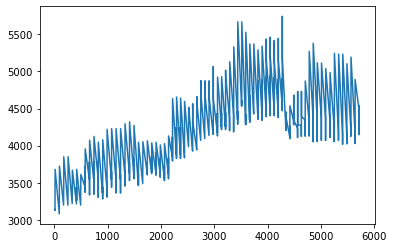

In [15]:
df3['price'].plot(kind='line')

<AxesSubplot:>

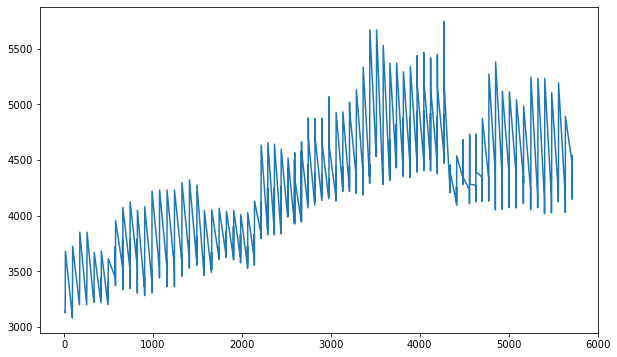

In [16]:
#그래프가 작으므로 그래프크기 수정함수
plt.rcParams['figure.figsize']=(10,6)  #가로, 세로
df3['price'].plot()

 # plot그래프
kind 옵션

<AxesSubplot:>

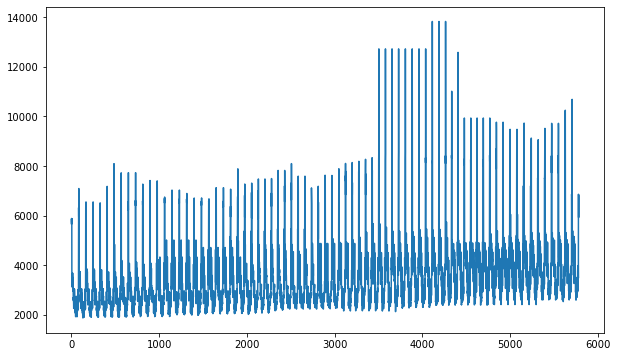

In [17]:
# line그래프=데이터가 연속적인 경우 좋은 사용예시 예)주가데이터, 일자별 온도데이터 (시계열)
df['price'].plot()

<AxesSubplot:>

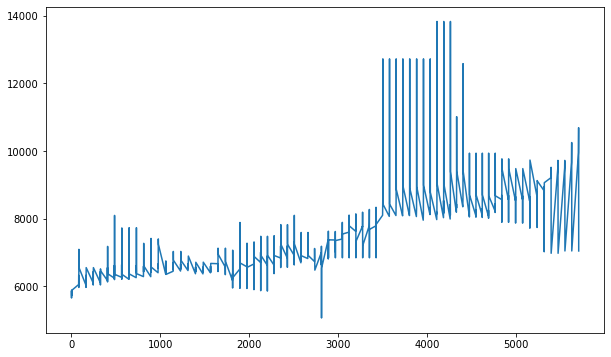

In [18]:
df_s = df2.loc[df['city']=='서울']
df_s['price'].plot()

<AxesSubplot:>

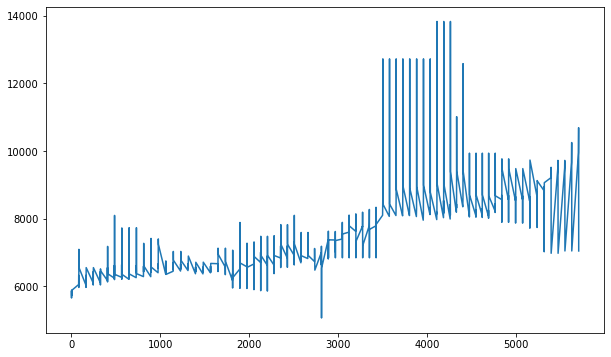

In [19]:
#카인드옵션으로 line을 설정해도 같은 그래프출력
df_s['price'].plot(kind='line')
#plot의 디폴트=line이기때문

In [20]:
df_s_year = df_s.groupby('year').mean()
df_s_year

,월,price
year,,
2015,11.0,6156.266667
2016,6.5,6591.950000
2017,6.5,6625.483333
2018,6.5,7030.983333
2019,6.5,8571.766667
2020,6.5,9024.550000
2021,5.7,8844.300000


<AxesSubplot:xlabel='year'>

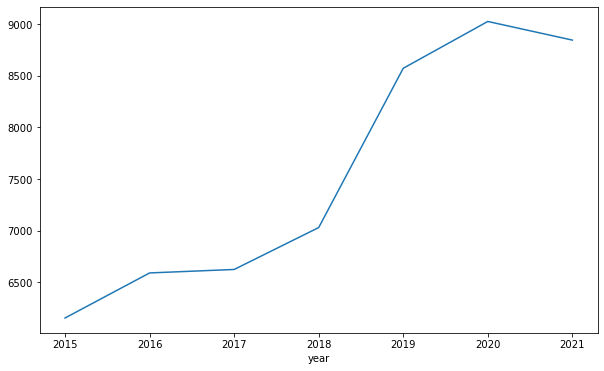

In [21]:
df_s_year['price'].plot(kind='line')

In [23]:
#연도별 국내 전체 분양가 평균
df_year = df3.groupby('year').mean()

In [24]:
# bar 그래프 =막대그래프 /bar H그래프 수평바그래프
df.groupby('city')['price'].mean()

city
강원    2615.449721
경기    4182.824324
경남    2976.174515
경북    2740.477011
광주    3376.805825
대구    3962.891967
대전    3206.410256
부산    3814.151351
서울    7685.597260
세종    3145.453968
울산    3423.466942
인천    3938.234973
전남    2490.761111
전북    2438.693989
제주    3965.241611
충남    2607.054131
충북    2399.967391
Name: price, dtype: float64

<AxesSubplot:xlabel='city'>

C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from c

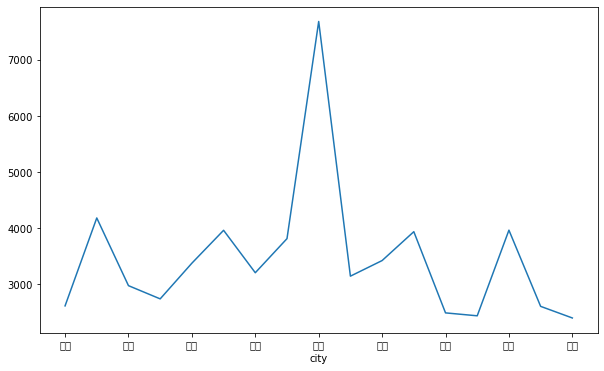

In [25]:
df.groupby('city')['price'].mean().plot()

꺾은선 그래프라서 가독성떨어짐

<AxesSubplot:xlabel='city'>

C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from c

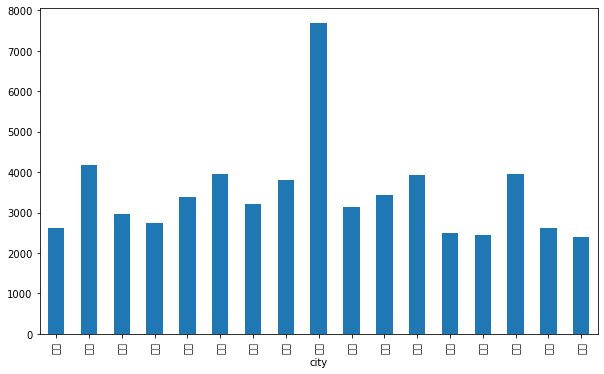

In [26]:
df.groupby('city')['price'].mean().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

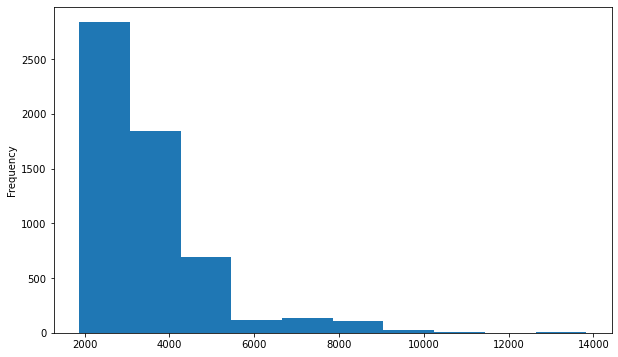

In [27]:
# 히스토그램(hist) : 데이터의 분포와 빈도를 시각화시켜 보여줌
df['price'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

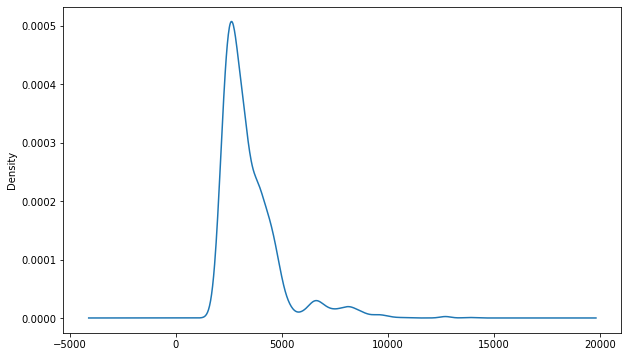

In [28]:
#커널밀도 그래프 : 히스토그램과 유사하지만 곡선으로 되어있음
df['price'].plot(kind='kde')

In [29]:
#박스플롯 
df_s=df.loc[df['city']=='서울']

<AxesSubplot:>

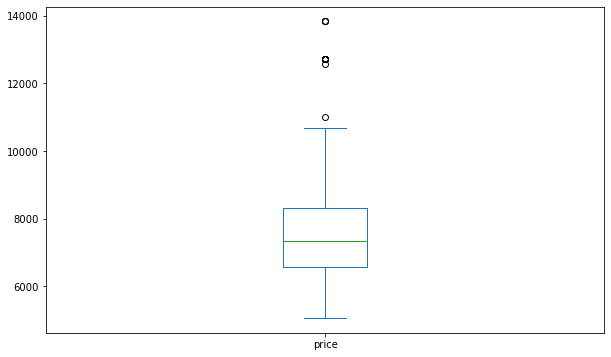

In [31]:
df_s['price'].plot(kind='box')

In [32]:
df_s.describe()
#박스플롯의 아웃라이어 25~75%범위를 표현하는데 사용

,Unnamed: 0,year,월,price
count,365.000000,365.000000,365.000000,365.000000
mean,3064.301370,2018.287671,6.575342,7685.597260
std,1797.397796,1.781155,3.480392,1471.578947
min,0.000000,2015.000000,1.000000,5061.000000
25%,1531.000000,2017.000000,4.000000,6578.000000
50%,3062.000000,2018.000000,7.000000,7351.000000
75%,4593.000000,2020.000000,10.000000,8330.000000
max,6208.000000,2021.000000,12.000000,13835.000000


<AxesSubplot:xlabel='월'>

C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


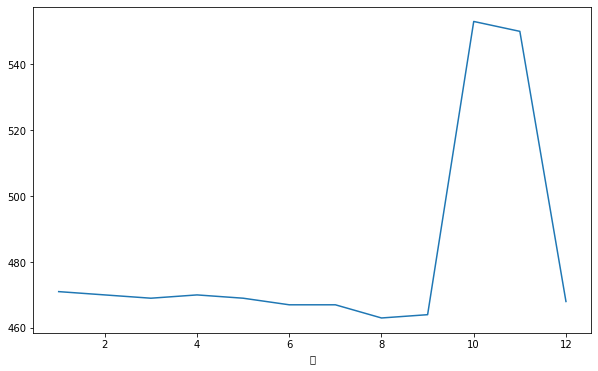

In [34]:
# area plot
df.groupby('월')['price'].count().plot(kind='line')
# 해당범위를 라인아래에 표시

<AxesSubplot:xlabel='월'>

C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


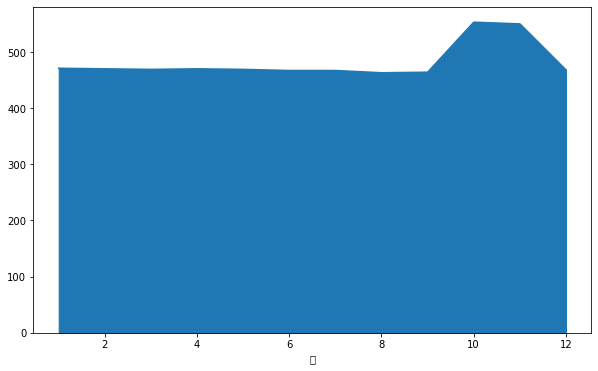

In [35]:
df.groupby('월')['price'].count().plot(kind='area')
#라인아래의 범위를 색채우기로 표시

<AxesSubplot:ylabel='price'>

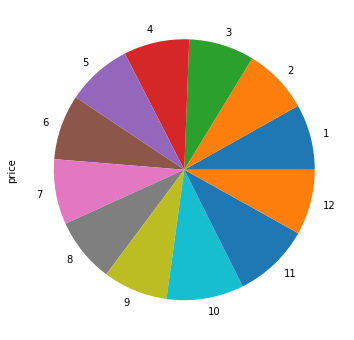

In [36]:
#데이터 점유율표시 용이 : 파이그래프
df.groupby('월')['price'].count().plot(kind='pie')

<AxesSubplot:xlabel='year', ylabel='price'>

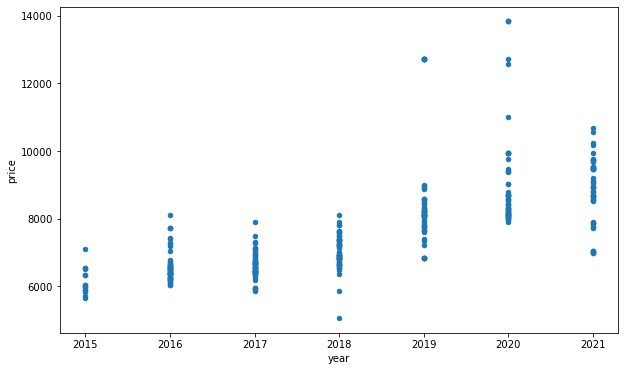

In [38]:
#산점도그래프 : 반드시 x,y축 지정해줘야함
df_s.plot(x='year',y='price', kind='scatter')

판다스 시각화 관련해서 참고자료는 
구글에 [pandas plot] 검색하면 좋음

# 2_matplotlib과 seaborn 라이브러리 시각화

In [39]:
#  import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
tips= sns.load_dataset('tips')
tips.head()
# 어느레스토랑의 결제 내역 데이터 , size= person

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<AxesSubplot:xlabel='day', ylabel='tip'>

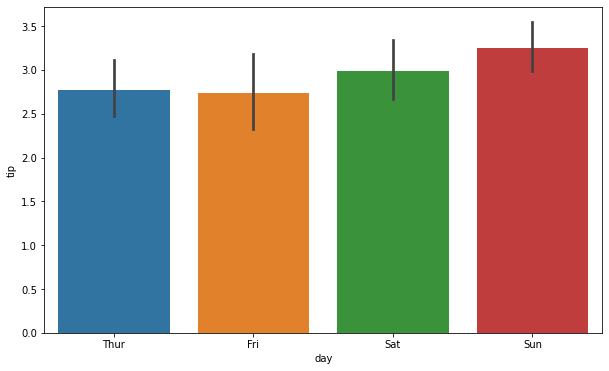

In [42]:
sns.barplot(x='day',y='tip',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

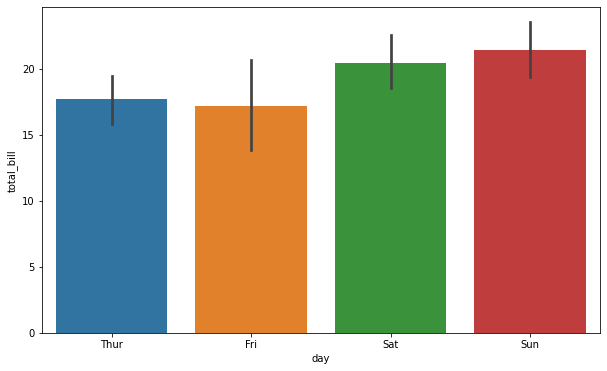

In [43]:
#seaborn라이브러리를 활용해서 요일별 전체 금액을 막대그래프를 막대그래프로 표현
sns.barplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

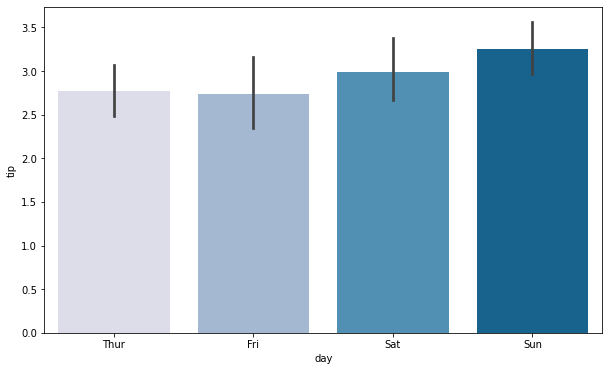

In [44]:
#seborn장점=색상지정가능 
#1.구글에서 팔레트정보 검색하면됨 
sns.barplot(x='day',y='tip',data=tips,palette='PuBu')

In [46]:
# 2.팔레트코드를 오입력하고 ValueError 메세지에 나오는 코드를 참조 
sns.barplot(x='day',y='tip',data=tips,palette='ㅁㅁㅁ')

ValueError: ㅁㅁㅁ is not a valid palette name

<AxesSubplot:xlabel='day', ylabel='tip'>

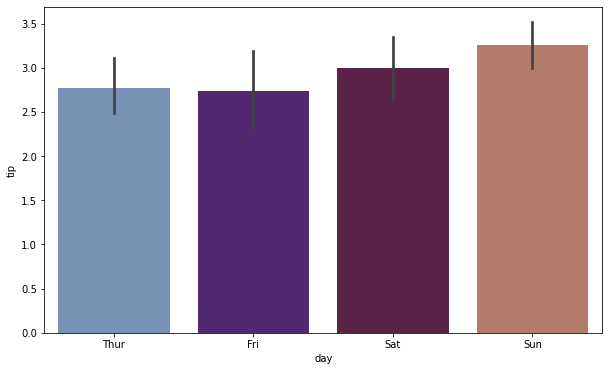

In [47]:
sns.barplot(x='day',y='tip',data=tips,palette='twilight')

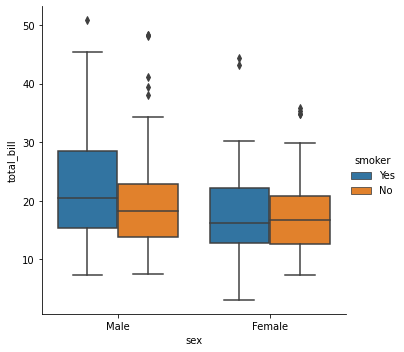

In [49]:
sns.catplot(x='sex',y='total_bill',
           hue='smoker',
           data=tips,
           kind='box')
#1차(x,y) 2차(hue)로 분류 1차 성별분류, 2차분류 흡연/비흡연자

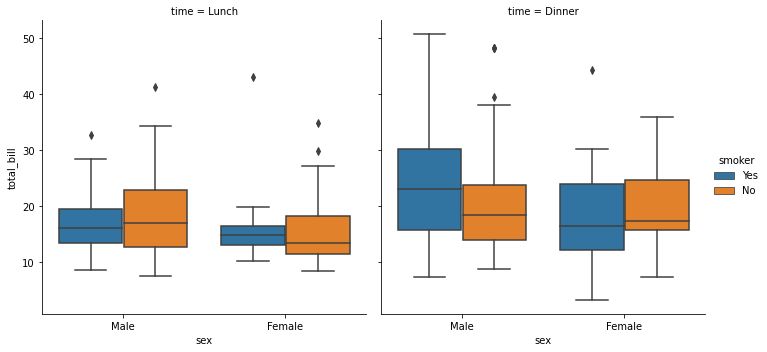

In [50]:
#3차분류 col
sns.catplot(x='sex',y='total_bill',
           hue='smoker',
           col='time',
           data=tips,
           kind='box')

## seaborn에서 제공하는 통계기반시각화

<AxesSubplot:xlabel='day', ylabel='tip'>

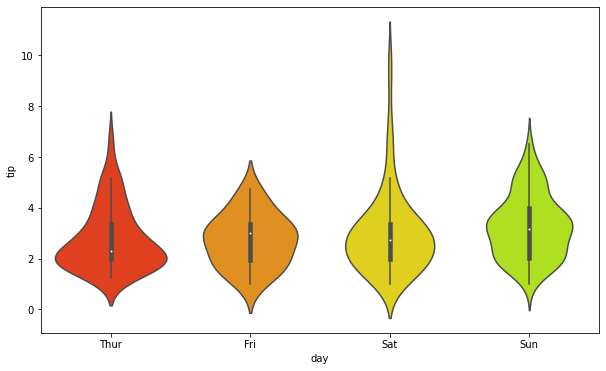

In [54]:
#바이올린플롯- 굵은면적=데이터값 분포도 많음
sns.violinplot(x='day',y='tip',data=tips,palette='prism')

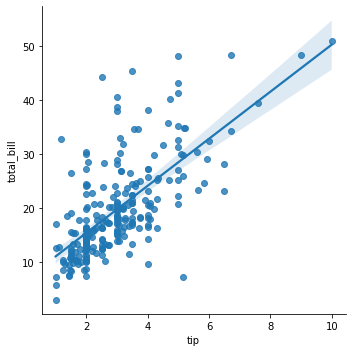

In [56]:
#lm플롯  지정한 xy값의 관계에따른 산점도와 추세선으로 음양관계, 분포까지 알수 있음
sns.lmplot(x='tip',y='total_bill',data=tips)#팔레지정안됌

<AxesSubplot:>

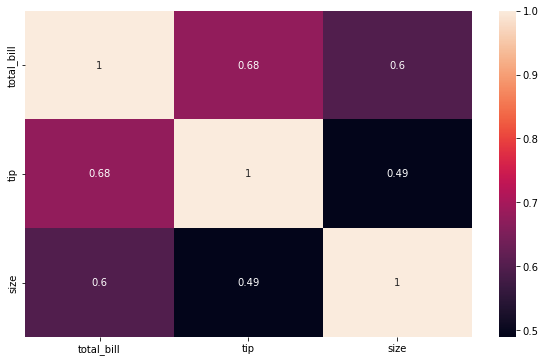

In [57]:
#히트맵 : 상관관계 계수 표현가능 밝은색깔일수록 상관관계 높음,어두울 수록 상관관계낮음
sns.heatmap(tips.corr(),annot=True)# false입력하면 상관계수 안보임